---
title: 文本向量系列-基于潜在语义分析的词向量
date: 2018-08-18 18:17:55
tags: [python, 文本挖掘]
toc: true
xiongzhang: true
xiongzhang_images: [main.jpg]

---
<span></span>
<!-- more -->

### 系列文章

这个是系列博客, 所有文章链接都列在这里, 并持续更新中。

<ul>
<li><a href="http://mlln.cn/2018/08/17/文本向量化理论和实践教程/" >文本向量化理论和实践教程</a></li>
<li><a href="http://mlln.cn/2018/08/17/文本向量系列-如何基于拼音构建字向量/" >文本向量系列-如何基于拼音构建字向量</a></li>
<li><a href="http://mlln.cn/2018/08/18/文本向量系列-如何基于笔画+拼音构建字向量/" >文本向量系列-如何基于笔画+拼音构建字向量/</a></li>
<li><a href="http://mlln.cn/2018/08/18/文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量/" >文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量/</a></li>
 <li><a href="http://mlln.cn/2018/08/18/文本向量系列-基于潜在语义分析的词向量/" >文本向量系列-基于潜在语义分析的词向量</a></li>
</ul>

### 概念

摘自(潜在语义分析理论及其应用)

潜在语义分析(LSA)是一种用于知识获取和展示的计算理论和方法,它使用统计计算的方法对大量的文本集进行分析,从而提取和表示出词的语义, 这种潜在语义,是词语所有的上下文语境信息的总和。这是因为,上下文环境对其中的事物提供了一组相互联系和制约,在很大程度上决定了词语之间应用义上的相关性。

潜在语义分析出发点就是文本中的词与词之间存在某种联系,即存在某种潜在的语义结构。这种潜在的语义结构隐含在文本中词语的上下文使用模式中。 因此采用统计计算的方法,对大量的文本中进行分析来寻找这种潜在的语义结构,它不需要确定的语义编码,仅依赖于上下文中事物的联系, 并用语义结构来表示词和文本, 达到消除词之间的相关性, 简化文本向量的目的

### 实现方法

为实现 LSA , 需要通过数学方法建立潜在语义空间模型, 这是 LSA 一个关键性的问题, 直接影响运用 LSA 的性能。从提出 LSA 思想方法以来,研究者不断尝试与改进, 努力寻求最佳的提取潜在语义空间的数学方法, 使 LSA 思想得到有效的应用。模型选择时,需要综合考虑处理大数据量的计算复杂度、存储空间代价、计算时内存消耗、语义模型的表达能力、模型的最优化衡量标准、模型的结合能力、更新算法复杂度等多种因素。还可以根据特定的使用要求、所需处理数据的特点等,选择适合特定需求的最佳方法。

一般常用的方法是: LSA/SVD, PLSA, SOM等, 今天我们主要使用LSA/SVD方法来示范潜在语义分析, 以后有时间会把PLSA和SOM方法也写出来, 不过那就是另一篇文章了。

### LSA/SVD实现

LSA/SVD 是目前普遍使用的典型LSA空间的构造方法。通过对文本集的词-文档矩阵的奇异值分解(Singular ValueDecomposition ,SVD)计算, 并提取K 个最大的奇异值及其对应的奇异矢量构成新矩阵来近似表示原文本集的词条-文本矩阵。

#### 语料库

为了加快运算, 我们使用一个很小的语料库, 这个语料库就直接写在代码里了。

In [2]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

#### 计算词典和词频数矩阵

词典就是词到词id的映射, 这样我们可以用id(一个整数)表示一个词了。

In [3]:
from collections import Counter
from itertools import chain
import numpy as np

def word_matrix(documents):
    '''计算词频矩阵'''
    # 所有字母转换位小写
    docs = [d.lower() for d in documents]
    # 分词
    docs = [d.split() for d in docs]
    # 获取所有词
    words = list(set(chain(*docs)))
    # 词到ID的映射, 使得每个词有一个ID
    dictionary = dict(zip(words, range(len(words))))
    # 创建一个空的矩阵, 行数等于词数, 列数等于文档数
    matrix = np.zeros((len(words), len(docs)))
    # 逐个文档统计词频
    for col, d in enumerate(docs):
        # 统计词频
        count = Counter(d)
        for word in count:
            # 用word的id表示word在矩阵中的行数
            id = dictionary[word]
            # 把词频赋值给矩阵
            matrix[id, col] = count[word]
    return matrix, dictionary

matrix, dictionary = word_matrix(documents)

In [4]:
matrix[:10, :10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 2., 0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [6]:
print(dictionary)

{'iv': 0, 'minors': 1, 'lab': 2, 'trees': 3, 'of': 4, 'graph': 5, 'eps': 6, 'opinion': 7, 'binary': 8, 'measurement': 9, 'survey': 10, 'paths': 11, 'widths': 12, 'testing': 13, 'ordering': 14, 'engineering': 15, 'machine': 16, 'for': 17, 'computer': 18, 'to': 19, 'applications': 20, 'response': 21, 'system': 22, 'perceived': 23, 'intersection': 24, 'a': 25, 'time': 26, 'relation': 27, 'human': 28, 'random': 29, 'well': 30, 'unordered': 31, 'the': 32, 'generation': 33, 'quasi': 34, 'user': 35, 'in': 36, 'management': 37, 'error': 38, 'abc': 39, 'interface': 40, 'and': 41}


#### SVD分解

关于svd分解可以参阅网上相关资料, 宗旨使用svd分解的目的就是降低噪音并降低词向量/文档向量所在空间的维度, 因为我们的语料库比较小, 所以我们就让维度降到3好了。但是通常在大型的语料库进行LSA分析的时候, 通常降维到100-300之间。



In [7]:
from scipy import linalg
# 使用scipy模块进行svd分解, 得到三个矩阵
U, sigma, VT = linalg.svd(matrix)

In [9]:
print('U.shape:', U.shape)
print('sigma.shape:', sigma.shape)
print('VT.shape:', VT.shape)

U.shape: (42, 42)
sigma.shape: (9,)
VT.shape: (9, 9)


In [21]:
# 降维后的维数
n = 3

# 取前n个向量
U2=U[:, :n]
VT2=VT[:n]

# 把向量转换位对角矩阵
sigma_matrix=linalg.diagsvd(sigma, U2.shape[0], VT2.shape[1])
# 截取相应的部分
sigma_matrix=sigma_matrix[:U2.shape[1],:VT2.shape[0]]

# SVD的逆运算, 得到新的语义空间, 它和词频矩阵有相同的形状
X_new=np.dot(U2, sigma_matrix)
X_new=np.dot(X_new, VT2)
print('估计得到的潜在语义空间')
print('X_new.shape:', X_new.shape)

估计得到的潜在语义空间
X_new.shape: (42, 9)


#### 使用词向量计算词之间的相关性

我们可以看到语义接近的词的cosine值偏小。感兴趣的人可以拿这个图跟前一篇文章进行对比(文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量), 可以看出LSA可以揭示词的语义相关性。而tf-idf方法效果较差。

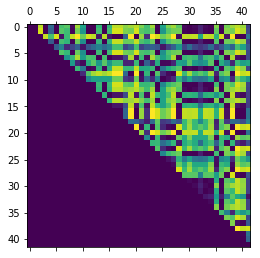

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


def word_relations(weights, ):
    relations = np.zeros((len(weights), len(weights)))
    for i in range(len(weights)):
        vec1 = weights[i]
        for j in range(i, len(weights)):
            vec2 = weights[j]
            relations[i, j] = cosine(vec1, vec2)
    reverse = dict(zip(dictionary.values(), dictionary.keys()))
    plt.matshow(relations)
    
word_relations(X_new)

#### 根据文档向量计算文档的相似性

同类的文档cosine值较小。感兴趣的人可以拿这个图跟前一篇文章进行对比(文本向量系列-如何基于词频矩阵和TF-IDF权重构建词向量), 可以看出LSA可以揭示文档的语义相关性。而tf-idf方法效果较差。

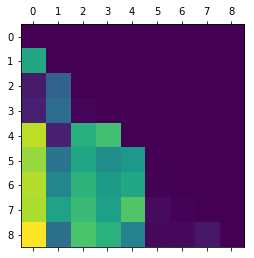

In [23]:
def doc_relations(weights):
    n = weights.shape[1]
    relations = np.zeros((n, n))
    for i in range(n):
        vec1 = weights[:, i]
        for j in range(i, n):
            vec2 = weights[:, j]
            relations[j, i] = cosine(vec1, vec2)
    reverse = dict(zip(dictionary.values(), dictionary.keys()))
    plt.matshow(relations)
    
doc_relations(X_new)

### 总结

根据上面的实验, 可以看出LSA即便在较小的语料库上也能显现出效果, 而tf-idf或者词频矩阵这些方法构建的词向量的效果要差很多。所以, LSA经常被用来计算词/文档的相似性。